In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn.metrics as sm

In [7]:
%matplotlib inline

In [11]:
dd = pd.read_csv('..//datasets/diabetes.csv')

In [12]:
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [13]:
dd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [14]:
sum(dd.isnull().sum())

0

In [15]:
print((dd[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]==0).sum())

Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [19]:
dd[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']] = dd[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.nan)

In [20]:
print(dd.isnull().sum())

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [22]:
dd.fillna(dd.mean(), inplace=True)

In [23]:
print(dd.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
dd

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.000000,153.743295,33.6,0.127,47,1
1,0,84.0,82.000000,31.000000,125.000000,38.2,0.233,23,0
2,0,145.0,72.403665,29.341275,153.743295,44.2,0.630,31,1
3,0,135.0,68.000000,42.000000,250.000000,42.3,0.365,24,1
4,1,139.0,62.000000,41.000000,480.000000,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.000000,55.000000,29.7,0.370,33,0
1996,8,179.0,72.000000,42.000000,130.000000,32.7,0.719,36,1
1997,6,85.0,78.000000,29.341275,153.743295,31.2,0.382,42,0
1998,0,129.0,110.000000,46.000000,130.000000,67.1,0.319,26,1


In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
labelEncoder = LabelEncoder()

In [28]:
dataTransform = dd.copy()

In [30]:
for data in dd.columns:
    dataTransform[data] = labelEncoder.fit_transform(dd[data])

In [31]:
dataTransform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,76,15,28,92,120,18,26,1
1,0,21,28,24,77,166,102,2,0
2,0,83,22,22,92,212,343,10,1
3,0,73,19,35,134,199,203,3,1
4,1,77,15,34,172,188,298,0,0
...,...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12,0
1996,8,117,21,35,82,113,380,15,1
1997,6,22,26,22,92,101,214,21,0
1998,0,67,44,39,82,245,170,5,1


In [32]:
X = dataTransform.drop(['Outcome'], axis=1)

In [33]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,76,15,28,92,120,18,26
1,0,21,28,24,77,166,102,2
2,0,83,22,22,92,212,343,10
3,0,73,19,35,134,199,203,3
4,1,77,15,34,172,188,298,0
...,...,...,...,...,...,...,...,...
1995,2,12,16,16,26,88,206,12
1996,8,117,21,35,82,113,380,15
1997,6,22,26,22,92,101,214,21
1998,0,67,44,39,82,245,170,5


In [34]:
Y = dataTransform['Outcome']

In [35]:
Y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [36]:
diabetes_feture_list = list(X.columns)

In [37]:
diabetes_feture_list

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 54)

In [44]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
275,2,37,20,45,28,186,361,4
616,6,54,37,22,92,80,44,9
449,0,57,23,10,33,96,146,5
268,0,39,8,22,92,46,0,0
624,2,45,16,22,92,98,45,0
...,...,...,...,...,...,...,...,...
1047,11,48,29,33,92,227,442,24
1807,5,34,25,19,92,140,211,31
898,0,73,35,39,88,187,145,5
1349,9,61,20,37,61,116,208,19


In [45]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
793,13,90,33,26,7,62,387,22
1553,3,17,22,22,92,112,58,1
1315,1,46,11,13,84,47,423,2
159,16,101,21,34,71,190,415,26
903,2,77,24,22,92,51,54,8
...,...,...,...,...,...,...,...,...
549,4,126,44,24,92,78,363,16
1858,9,39,25,30,92,115,357,25
645,2,95,23,28,168,177,23,9
880,6,39,33,32,92,141,360,7


In [46]:
Y_train

275     0
616     0
449     0
268     0
624     0
       ..
1047    1
1807    1
898     0
1349    0
1135    1
Name: Outcome, Length: 1600, dtype: int64

In [47]:
Y_test

793     1
1553    0
1315    0
159     1
903     0
       ..
549     0
1858    1
645     0
880     0
1588    0
Name: Outcome, Length: 400, dtype: int64

In [48]:
X_train.shape

(1600, 8)

In [49]:
Y_train.shape

(1600,)

In [50]:
X_test.shape

(400, 8)

In [51]:
Y_test.shape

(400,)

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rfc = RandomForestClassifier(n_estimators=1200)

In [55]:
rfc.fit(X_train,Y_train)

,n_estimators,1200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
prediction_y = rfc.predict(X_test)

In [57]:
prediction_y

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,

In [58]:
experiment_accuracy = sm.accuracy_score(Y_test, prediction_y)
print('Accuracy Score is : ', str(experiment_accuracy))

Accuracy Score is :  1.0


In [60]:
from sklearn import metrics

In [64]:
print("Classification Report : ", metrics.classification_report(prediction_y,Y_test,target_names=['Diabetes','No Diabetes']))

Classification Report :                precision    recall  f1-score   support

    Diabetes       1.00      1.00      1.00       255
 No Diabetes       1.00      1.00      1.00       145

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
import seaborn as sb

In [67]:
sb.set()

In [68]:
get_ipython().run_line_magic('matplotlib','inline')

In [69]:
import matplotlib.pyplot as pt

In [70]:
cm = confusion_matrix(Y_test,prediction_y)

Text(109.44999999999997, 0.5, 'predicted class axis')

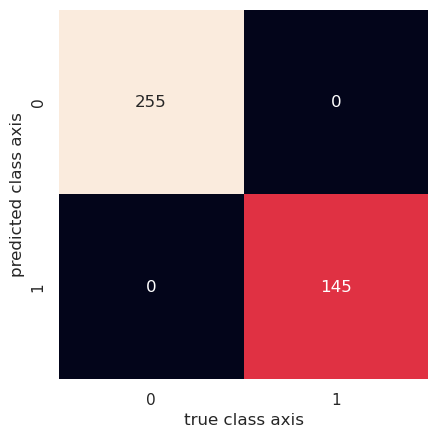

In [77]:
sb.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
pt.xlabel('true class axis')
pt.ylabel('predicted class axis')